# **Build a Linear Regression model in Python**
Using a Diabetes dataset and scikit-learn

The following code is based on the Data Professor tutorial: https://www.youtube.com/watch?v=R15LjD8aCzc 

In [4]:
from sklearn import datasets

diabetes = datasets.load_diabetes()
diabetes

{'DESCR': '.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, b

In [5]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

**Features names**

In [6]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


**X and Y datasets creation**

In [7]:
X = diabetes.data
Y = diabetes.target
X.shape, Y.shape

#Shape of X is 442 rows and 10 column, Y is 442 rows and 1 column

((442, 10), (442,))

In [9]:
# This is the same as previous steps
X, Y = datasets.load_diabetes(return_X_y=True)
X.shape, Y.shape

((442, 10), (442,))

**Data split**

In [11]:
from sklearn.model_selection import train_test_split

The following lines will create 4 datasets, taking 80% of the original for training, and 20% for testing

In [12]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [14]:
# Following numbers represent the 80/20 ratio
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((353, 10), (353,), (89, 10), (89,))

**Linear Regression Model**

For more information about the Ordinary Least Squares Linear Regression, please visit here: https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares 

LinearRegression will take in its fit method arrays X, y and will store the coefficients  of the linear model in its coef_ member. 

In [15]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
model = linear_model.LinearRegression()

In [18]:
# Build the model using the training dataset
model.fit(X_train, Y_train)

LinearRegression()

In [19]:
Y_pred = model.predict(X_test)

**Prediction results**

In [21]:
# Given that 10 features are used, 10 coefficients are shown, one for each feature
print('Coefficients: ', model.coef_)

# The Y intercept
print('Intercept: ', model.intercept_)
print('Mean squared error (MSE): %.2f' % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f' % r2_score(Y_test, Y_pred))

Coefficients:  [ -60.68392467 -287.6978509   488.22947408  409.62422    -750.9169028
  437.22838308  108.11637214  179.54605325  772.52652997   81.11711967]
Intercept:  151.458387545346
Mean squared error (MSE): 3305.04
Coefficient of determination (R^2): 0.44


In [24]:
print('Feature names: ', diabetes.feature_names)
print('Coefficients: ', model.coef_)

# The equation of the model would be: 
# Y = -60.68(age) -287.68(sex) + ... + 151.45 

Feature names:  ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Coefficients:  [ -60.68392467 -287.6978509   488.22947408  409.62422    -750.9169028
  437.22838308  108.11637214  179.54605325  772.52652997   81.11711967]


# **Same dataset, slightly different approach**

The following code is from the Scikit Learn website directly. In this example, only one feature is used, that's the reason why only one coefficient is shown. The code is from: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py 

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


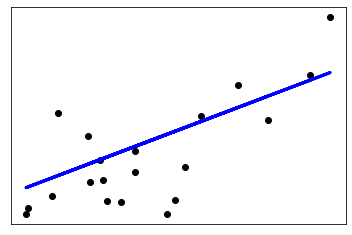

In [22]:
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()